<a href="https://colab.research.google.com/github/michael96247/CSE144-Applied-Machine-Learning-Homework/blob/main/CSE_144_Assignment_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
%matplotlib inline

# Assignment 2

**DUE: Sunday October 23 at 11:59pm**

Turn in the assignment via Canvas.

To write legible answers you will need to be familiar with both [Markdown](https://github.com/adam-p/markdown-here/wiki/Markdown-Cheatsheet) and [Latex](https://www.latex-tutorial.com/tutorials/amsmath/)

Before you turn this problem in, make sure everything runs as expected. First, restart the kernel (in the menubar, select Runtime→→Restart runtime) and then run all cells (in the menubar, select Runtime→→Run All).

Make sure you fill in any place that says "YOUR CODE HERE" or "YOUR ANSWER HERE", as well as your name below:

In [2]:
NAME = "Michael Chen"
STUDENT_ID = "1772059"

## Problem 1 - Yield Dataset with Polynomial Regression

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

This dataset of size $n = 15$ contains measurements of yield from an experiment done at five different temperature levels. The variables are $y = yield$ and $x = temperature$ in degrees Fahrenheit. Download the data from PyDrive.

In [4]:
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

In [5]:
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [6]:
downloaded = drive.CreateFile({'id':"1Oikuudc0715xr2QezMpKTNAD4_SdMfH3"})
downloaded.GetContentFile('yield.csv')  

In [7]:
# Create pandas dataframe
data = pd.read_csv('yield.csv')

In [8]:
# Let's look at the data
data

,50,3.3
0,50,2.8
1,50,2.9
2,70,2.3
3,70,2.6
4,70,2.1
5,80,2.5
6,80,2.9
7,80,2.4
8,90,3.0
9,90,3.1


In [9]:
# Look at data description
data.describe()

,50,3.3
count,14.000000,14.00000
mean,80.000000,2.80000
std,16.641006,0.38829
min,50.000000,2.10000
25%,70.000000,2.52500
50%,80.000000,2.85000
75%,90.000000,3.00000
max,100.000000,3.50000


In [10]:
# Split data in X and y using pandas functionality.
X = data.iloc[:,0] # Create vector of explanatory variables
y = data.iloc[:,1] # Create vector of target variables

# Cast dataframes into numpy arrays
X = X.values
y = y.values

# Split data into X_train, Y_train, X_test y_test using sklearn
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 0)

# Reshape X_train, X_test for sklearn LinearRegression
X_train = X_train.reshape(-1,1)
X_test = X_test.reshape(-1,1)

### a) Linear Regression (10 points)

We will run a simple linear regression on this well-curated dataset using sklearn's **LinearRegression**.

Hint: Review the sklearn docs https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html and class exercise.

In [11]:
from sklearn.linear_model import LinearRegression

from sklearn import linear_model
# Instantiate LinearRegression
regressor = LinearRegression() ### YOUR CODE HERE ### 

# Fit the regressor using X_train and y_train
regressor.fit(X_train, y_train)

### YOUR CODE HERE ###

LinearRegression()

Let's now visually inspect the model and see how well this model predicts the yield. 
* First, plot the yield vs. temperature points from training set in black.
* Then, plot the regression line in red. Predictions from the regression model lie along the red line.

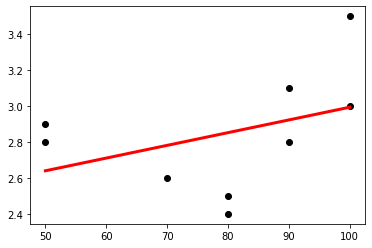

In [12]:
# Plot the actual yield (y_train) vs. temperature values from training set

### YOUR CODE HERE ###

plt.scatter(X_train, y_train, color='black')

line_x = np.linspace( np.min(X_train),np.max(X_train) ,9)
line_y = line_x * regressor.coef_ + regressor.intercept_ #regressor.predict(X_train)
plt.plot(line_x, line_y, color='red', linewidth=3)
plt.show()

### YOUR CODE HERE ###


Let's also visually inspect the prediction results from the test set.
* First, plot the yield vs. temperature points from the test set in black
* Then plot the regression line in red to see how prediction is similar to or different from the actual target.

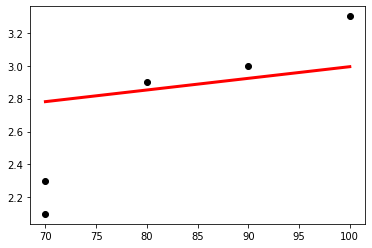

In [13]:
# Plot the actual yield (y_test) vs. temperature values  for the test set
plt.scatter(X_test, y_test, color='black')
# plt.title('Regression line and training data')

### YOUR CODE HERE ###

# Plot the regression line
line_x = np.linspace( np.min(X_test),np.max(X_test) ,5)
line_y = line_x * regressor.coef_ + regressor.intercept_# regressor.predict(X_test)
plt.plot(line_x, line_y, color='red', linewidth=3)

plt.show()

### YOUR CODE HERE ###

### b) Inspecting Linear Regression Model (5 points)

After inspecting the results visually, does this model appear to be a good or bad fit on the test set and training set? 

[YOUR ANSWER HERE] 
The model appears to be an ok fit for the training set. But it appears to be a bad fit on the test set. It seems like it requires polynomial regression.

Does the model display signs of underfitting? If so, why?

[YOUR ANSWER HERE]
The model displays signs of underfitting. The pattern that appears in the test set seems to be like a log function. It looks like it requires polynomial regression.

### c) Polynomial Regression (10 points)

Data may not follow a linear relationship from the independent variable $X$ to the dependent variable $y$. Fitting a linear model to this would be inaccurate and yield a high loss. 

If we want to model an order $d$ polynomial relationship between $X$ and $y$ we can augment our initial linear model where instead of having:
$$
y^{(i)} = \theta_0 + \theta_1 x^{(i)}
$$

We have:

$$
y^{(i)} = \theta_0 + \theta_1 x^{(i)} + \theta_2 {x^{(i)}}^2 + \cdots + \theta_d {x^{(i)}}^d
$$

We can use the same linear regression algorithm we if we first augment $X$ and add extra columns (or dimensions). 

$$ \textbf X =
\begin{bmatrix}
    x^{(1)}       & {x^{(1)}}^2 & \cdots & {x^{(1)}}^d \\
    x^{(2)}       & {x^{(2)}}^2 & \cdots & {x^{(2)}}^d \\
    \vdots       & \vdots & \ddots & \vdots \\
    x^{(n)}       & {x^{(n)}}^2 & \cdots & {x^{(n)}}^d
\end{bmatrix}$$

Then our new higher order $\hat Y$ is computed same as before.

$$ \hat Y =  X \theta =
\begin{bmatrix}
    1 & x^{(1)}       & {x^{(1)}}^2 & \cdots & {x^{(1)}}^d \\
    1 & x^{(2)}       & {x^{(2)}}^2 & \cdots & {x^{(2)}}^d \\
    \vdots & \vdots       & \vdots & \ddots & \vdots \\
    1 & x^{(n)}       & {x^{(n)}}^2 & \cdots & {x^{(n)}}^d
\end{bmatrix}
\begin{bmatrix}\theta_0 \\ \theta_1 \\ \vdots \\ \theta_{d} 
\end{bmatrix}=
\begin{bmatrix}
    \theta_0 + \theta_1 x^{(1)} + \theta_2 {x^{(1)}}^2 + \cdots + \theta_{d}  {x^{(1)}}^d \\
    \theta_0 + \theta_1 x^{(2)} + \theta_2 {x^{(2)}}^2 + \cdots + \theta_{d}  {x^{(2)}}^d  \\
    \vdots   \\
    \theta_0 + \theta_1 x^{(n)} + \theta_2 {x^{(n)}}^2 + \cdots + \theta_{d}  {x^{(n)}}^d
\end{bmatrix} 
= \begin{bmatrix}\hat y^{(1)} \\ \hat y^{(2)} \\ \vdots \\ \hat y^{(n)} 
\end{bmatrix}$$

Using sklearn's **PolynomialFeatures** functionality, we will now transform X_train and X_test into second order polynomial space.

For more info: https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html

In [14]:
# First, lets look at the values of X_train
print(X_train)

[[100]
 [ 90]
 [ 50]
 [ 80]
 [ 90]
 [ 70]
 [ 50]
 [ 80]
 [100]]


In [15]:
from sklearn.preprocessing import PolynomialFeatures

# Creates polynomial transform of degree 2
poly = PolynomialFeatures(2)

# Transform X_train X_test
X_train_pol = poly.fit_transform(X_train)
X_test_pol = poly.fit_transform(X_test)

# Print X_train_pol
print(X_train_pol)

[[1.0e+00 1.0e+02 1.0e+04]
 [1.0e+00 9.0e+01 8.1e+03]
 [1.0e+00 5.0e+01 2.5e+03]
 [1.0e+00 8.0e+01 6.4e+03]
 [1.0e+00 9.0e+01 8.1e+03]
 [1.0e+00 7.0e+01 4.9e+03]
 [1.0e+00 5.0e+01 2.5e+03]
 [1.0e+00 8.0e+01 6.4e+03]
 [1.0e+00 1.0e+02 1.0e+04]]


We can now fit a second degree polynomial regression model to the transformed data.

In [16]:
from sklearn.linear_model import LinearRegression
# Instantiate LinearRegression
regressor = LinearRegression()  ### YOUR CODE HERE ### 

# Fit the regressor using X_train_pol and y_train
regressor.fit(X_train_pol, y_train)

### YOUR CODE HERE ###

LinearRegression()

Now, visually inspect the polynomial regression model and see how well this model predicts the yield on the training set. 

Plot the yield vs. temperature points in black along with the polynomial regression line in red. Hint: For plotting the regression line, you can use the plot function to interpolate the regression line based on the model's prediction on data points.

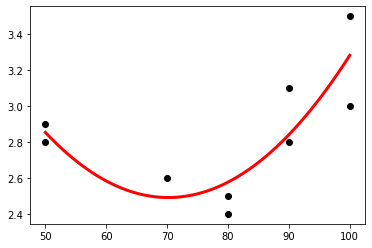

In [17]:
# Plot the actual yield (y_train) vs temp. values from training set

plt.scatter(X_train, y_train, color='black')  ### YOUR CODE HERE ###

# plt.plot(X_train_pol,regressor.predict(X_train_pol),'-r')
# plt.plot(line_x ,regressor.predict(X_train_pol),'-r')
x_line = np.linspace( np.min(X_train),np.max(X_train) ,100).reshape(-1, 1)
x_line = poly.fit_transform(x_line)

y_line = regressor.predict(x_line)
plt.plot(np.linspace( np.min(X_train),np.max(X_train) ,100), y_line, color='red', linewidth=3)
plt.show()

### YOUR CODE HERE ###

Lastly, let's plot the test set yield vs. temperature points along with the polynomial regression line.

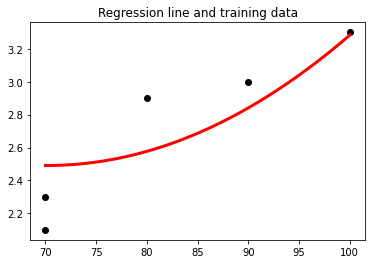

In [18]:
# Plot the actual yield (y_test) vs temp. values from test set

plt.scatter(X_test, y_test, color='black')

plt.title('Regression line and training data')

### YOUR CODE HERE ###


# Plot the regression line
# plt.plot(line_x, line_y, color='orangered', linewidth=3)
x_line = np.linspace( np.min(X_test),np.max(X_test) ,100).reshape(-1, 1)
x_line = poly.fit_transform(x_line)
y_line = regressor.predict(x_line)
plt.plot(np.linspace( np.min(X_test),np.max(X_test) ,100), y_line, color='red', linewidth=3)
plt.show()

### YOUR CODE HERE ###

### d) Inpsecting Polynomial Regression Model (5 points)

After inspecting the polynomial regression model, does the model appear to be a better fit than simple linear regression? 

[YOUR ANSWER HERE]
Yes, the model appears to be a better fit than simple linear regression.

Does the model address display more or less underfitting than the simple linear regression model and why?

[YOUR ANSWER HERE]
The model appears to be less underfitting because it follow the pattern in the test set more.

## Problem 2 - Fish Dataset

## Importing the Dataset

We will now perform different variations of linear regression to predict fish weight given species type, weight, and physical measurements. The different attributes of the data are:

- Species: species name of fish

- Weight: weight of fish in Gram (g)

- Length1: vertical length in (cm)

- Length2: diagonal length in (cm)

- Length3: cross length in (cm)

- Height: height in (cm)

- Width: diagonal width in (cm)

Begin by downloading the Fish.csv file from google drive. Make sure to select your @ucsc.edu email when authorizing access to your account. 

In [19]:
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

In [20]:
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [21]:
# Download the Fish data
downloaded = drive.CreateFile({'id':"13Q2WAaDIP6D5yrQlLV3OMnkmcwxcAwHz"})
downloaded.GetContentFile('Fish.csv')  

In [22]:
import pandas as pd

# Create pandas dataframe
fish_data = pd.read_csv('Fish.csv')

Let's look at some of the data and check some of the dataset descriptors.

In [23]:
# Let's print out the first few rows
fish_data.head()

,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340


In [24]:
# Let's get the data shape
fish_data.shape

(159, 7)

In [25]:
# Let's describe the data
fish_data.describe()

,Weight,Length1,Length2,Length3,Height,Width
count,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000
mean,398.326415,26.247170,28.415723,31.227044,8.970994,4.417486
std,357.978317,9.996441,10.716328,11.610246,4.286208,1.685804
min,0.000000,7.500000,8.400000,8.800000,1.728400,1.047600
25%,120.000000,19.050000,21.000000,23.150000,5.944800,3.385650
50%,273.000000,25.200000,27.300000,29.400000,7.786000,4.248500
75%,650.000000,32.700000,35.500000,39.650000,12.365900,5.584500
max,1650.000000,59.000000,63.400000,68.000000,18.957000,8.142000


In [26]:
# Lastly, let's get data info
fish_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159 entries, 0 to 158
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Species  159 non-null    object 
 1   Weight   159 non-null    float64
 2   Length1  159 non-null    float64
 3   Length2  159 non-null    float64
 4   Length3  159 non-null    float64
 5   Height   159 non-null    float64
 6   Width    159 non-null    float64
dtypes: float64(6), object(1)
memory usage: 8.8+ KB


### a) Removing 0's from data (5 points)

We can see that there aren't any null values in this dataset by using the .info() function. However, .describe() shows us there are weights of 0.0g which is ambiguous and is likely a recording error. 

Drop any row that has a weight of 0.0.

In [27]:
# Delete any rows for which there is a measurement of 0.0 for weight.
### YOUR CODE HERE ###
indexes= fish_data[ fish_data['Weight'] == 0].index
fish_data.drop(indexes, inplace=True)
# Let's take another look.
fish_data.describe()

,Weight,Length1,Length2,Length3,Height,Width
count,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000
mean,400.847468,26.293038,28.465823,31.280380,8.986790,4.424232
std,357.697796,10.011427,10.731707,11.627605,4.295191,1.689010
min,5.900000,7.500000,8.400000,8.800000,1.728400,1.047600
25%,121.250000,19.150000,21.000000,23.200000,5.940600,3.398650
50%,281.500000,25.300000,27.400000,29.700000,7.789000,4.277050
75%,650.000000,32.700000,35.750000,39.675000,12.371850,5.586750
max,1650.000000,59.000000,63.400000,68.000000,18.957000,8.142000


### b) Outlier Detection \& Elimination (5 points)

Using 4 standard deviations from the mean as our cut-off, and using the data listed using the describe function above, are there any outliers?

In [28]:
### YOUR CODE HERE ###

fish_data['WeightZ'] = (fish_data['Weight'] - fish_data['Weight'].mean() ) / fish_data['Weight'].std()
if (len(fish_data[ fish_data['WeightZ'] > 4]) or len(fish_data[ fish_data['WeightZ'] < -4])):
  print("outliers in Weight")

fish_data['Length1Z'] = (fish_data['Length1'] - fish_data['Length1'].mean() ) / fish_data['Length1'].std()
if (len(fish_data[ fish_data['Length1Z'] > 4]) or len(fish_data[ fish_data['Length1Z'] < -4])):
  print("outliers in Length1")

fish_data['Length2Z'] = (fish_data['Length2'] - fish_data['Length2'].mean() ) / fish_data['Length2'].std()
if (len(fish_data[ fish_data['Length2Z'] > 4]) or len(fish_data[ fish_data['Length2Z'] < -4])):
  print("outliers in Length2")

fish_data['Length3Z'] = (fish_data['Length3'] - fish_data['Length3'].mean() ) / fish_data['Length3'].std()
if (len(fish_data[ fish_data['Length3Z'] > 4]) or len(fish_data[ fish_data['Length3Z'] < -4])):
  print("outliers in Length3")

fish_data['HeightZ'] = (fish_data['Height'] - fish_data['Height'].mean() ) / fish_data['Height'].std()
if (len(fish_data[ fish_data['HeightZ'] > 4]) or len(fish_data[ fish_data['HeightZ'] < -4])):
  print("outliers in Height")


fish_data['WidthZ'] = (fish_data['Width'] - fish_data['Width'].mean() ) / fish_data['Width'].std()
if (len(fish_data[ fish_data['WidthZ'] > 4]) or len(fish_data[ fish_data['WidthZ'] < -4])):
  print("outliers in Width")

fish_data = fish_data.drop(columns = ['WeightZ', 'Length1Z', 'Length2Z', 'Length3Z', 'HeightZ', 'WidthZ'])
fish_data.describe()

,Weight,Length1,Length2,Length3,Height,Width
count,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000
mean,400.847468,26.293038,28.465823,31.280380,8.986790,4.424232
std,357.697796,10.011427,10.731707,11.627605,4.295191,1.689010
min,5.900000,7.500000,8.400000,8.800000,1.728400,1.047600
25%,121.250000,19.150000,21.000000,23.200000,5.940600,3.398650
50%,281.500000,25.300000,27.400000,29.700000,7.789000,4.277050
75%,650.000000,32.700000,35.750000,39.675000,12.371850,5.586750
max,1650.000000,59.000000,63.400000,68.000000,18.957000,8.142000


[YOUR ANSWER HERE]
There are no outliers in all the columns.

## Problem 3 - Fish Linear Regression

You will now run different versions of linear regression in order to predict fish Weight using the 6 explanatory variables.

### a) Multiple Linear Regression (6 points)

First, run a multiple linear regression using only the height, width, and length measurements to predict weight. We will begin by splitting the data into features **X_fish** and target variable **y_fish**.

In [29]:
y_fish = fish_data.iloc[:, 1] # Get Fish Weights
X_fish = fish_data.drop(columns=['Weight']) # Get Fish measurements plus species
X_fish = X_fish.drop(columns=['Species']) # Drop the Fish Species for now

# Print X.head(), you should have 5 features for each sample
print("X_fish.head():")
print(X_fish.head())

# Print y.head(), you should have one label for each sample
print("\ny_fish.head()")
print(y_fish.head())

X_fish.head():
   Length1  Length2  Length3   Height   Width
0     23.2     25.4     30.0  11.5200  4.0200
1     24.0     26.3     31.2  12.4800  4.3056
2     23.9     26.5     31.1  12.3778  4.6961
3     26.3     29.0     33.5  12.7300  4.4555
4     26.5     29.0     34.0  12.4440  5.1340

y_fish.head()
0    242.0
1    290.0
2    340.0
3    363.0
4    430.0
Name: Weight, dtype: float64


Now, we are almost ready to run regression with scikit-learn. We need to first convert **X_fish** and **y_fish** into numpy arrays and split the data into training and validation splits using sklearn **train_test_split**. 

sklearn's train_test_split offers customizable functionality when creating training and test sets. For more information, checkout https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html .

In [30]:
# Convert X, and y into np arrays
X_fish = X_fish.values
y_fish = y_fish.values

# Split data into train test split
from sklearn.model_selection import train_test_split
X_fish_train, X_fish_test, y_fish_train, y_fish_test = train_test_split(X_fish, y_fish, test_size = 0.2, random_state = 0)

Now we are ready to run a multiple linear regression. Use sklearn's **LinearRegression** to carry out the regression.

In [31]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression() ### YOUR CODE HERE ### 

# Fit the regressor using X_fish_train and y_fish_train
### YOUR CODE HERE ###
regressor.fit(X_fish_train, y_fish_train)


LinearRegression()

Now let's see how we did and generate predictions for X_fish_test. Then print predicted values and actual target values side-by-side for a visual comparison.

In [32]:
# Generate predictions using X_fish_test
y_fish_pred = regressor.predict(X_fish_test)### YOUR CODE HERE ### 

# Print the predictions along with actual weights
print(y_fish_pred)
print(y_fish_test)

compare_data = {'y_fish_pred': y_fish_pred, 'y_fish_test':  y_fish_test}
pd.DataFrame(data=compare_data)
### YOUR CODE HERE ### 

[ 476.59117882  207.99295613  696.61277798  829.8356242   155.66081611
  839.43077312  756.42454219  860.9053846   648.06518937  194.36935617
  656.33115593  988.3533044   694.41908995   27.97315647   90.40492061
  279.88428528  426.51714491  253.27497124  988.3533044   380.41382554
  203.773294    873.13422668  776.42866652  514.64529123  156.2549434
   98.82407554  423.34057751  638.76055132 -203.30791322  611.87530104
  352.87773986  307.75783507]
[ 390.   160.   700.  1015.   120.  1100.   820.   950.   556.   145.
  700.  1600.   720.    55.    85.   188.   300.   180.  1550.   306.
  140.   975.  1000.   450.   110.    78.   300.   650.     6.7  514.
  290.   270. ]


,y_fish_pred,y_fish_test
0,476.591179,390.0
1,207.992956,160.0
2,696.612778,700.0
3,829.835624,1015.0
4,155.660816,120.0
5,839.430773,1100.0
6,756.424542,820.0
7,860.905385,950.0
8,648.065189,556.0
9,194.369356,145.0


### b) Computing MSE and R-squared for MLR (5 points)

The model appears to do an okay job predicting some weights while missing the mark on others. Let's quantify the results by computing mean squared error (MSE) and the coefficient of determination (R-squared). sklearn's metrics package provides functions to compute the values for you. 

More info can be found here: 

https://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_squared_error.html
https://scikit-learn.org/stable/modules/generated/sklearn.metrics.r2_score.html

In [33]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

# Compute the mean squared error using y_fish_test and y_fish_pred
### YOUR CODE HERE ###
print(mean_squared_error(y_fish_test, y_fish_pred, squared=True))

# Compute the coefficient of determination using y_fish_test and y_fish_pred
### YOUR CODE HERE ###
print(r2_score(y_fish_test, y_fish_pred))


31561.77306754145
0.8245122776931346


Using the y_fish_test and y_fish_pred, what was the mean squared error for this model?

[YOUR ANSWER HERE]
The mean squared error is 31561.77306754145 

Using the y_fish_test and y_fish_pred, what was the coefficient of detemination for this model?

[YOUR ANSWER HERE]
The coefficient of detemination for this model is 0.8245122776931346

### c) Polynomial Multiple Linear Regression (12 points)

We have seen how polynomial regression can increase the predictive power of linear regression models. We will now run a polynomial multiple linear regression model in order to gain a more accurate model. Begin by transforming the features X_fish_test and X_fish_train into second order polynomial space. There will be interaction terms in the transformed dataset as well. For more on interaction terms visit the sklearn docs.

In [34]:
from sklearn.preprocessing import PolynomialFeatures
# Create polynomial transform of degree 2. hint: problem 1
poly = PolynomialFeatures(2) ### YOUR CODE HERE ###

# Transform X_fish_train X_fish_test to second order polynomial space
X_fish_train_pol = poly.fit_transform(X_fish_train) ### YOUR CODE HERE ###
X_fish_test_pol = poly.fit_transform(X_fish_test) ### YOUR CODE HERE ###

# Print 5 rows of X_fish_train_poly, shape should be (5,21)
print(X_fish_train_pol[:5])
print(X_fish_train_pol[:5].shape)

### YOUR CODE HERE ###

[[1.00000000e+00 3.04000000e+01 3.30000000e+01 3.83000000e+01
  1.48604000e+01 5.28540000e+00 9.24160000e+02 1.00320000e+03
  1.16432000e+03 4.51756160e+02 1.60676160e+02 1.08900000e+03
  1.26390000e+03 4.90393200e+02 1.74418200e+02 1.46689000e+03
  5.69153320e+02 2.02430820e+02 2.20831488e+02 7.85431582e+01
  2.79354532e+01]
 [1.00000000e+00 3.48000000e+01 3.73000000e+01 3.98000000e+01
  6.28840000e+00 4.01980000e+00 1.21104000e+03 1.29804000e+03
  1.38504000e+03 2.18836320e+02 1.39889040e+02 1.39129000e+03
  1.48454000e+03 2.34557320e+02 1.49938540e+02 1.58404000e+03
  2.50278320e+02 1.59988040e+02 3.95439746e+01 2.52781103e+01
  1.61587920e+01]
 [1.00000000e+00 4.00000000e+01 4.25000000e+01 4.55000000e+01
  6.82500000e+00 4.45900000e+00 1.60000000e+03 1.70000000e+03
  1.82000000e+03 2.73000000e+02 1.78360000e+02 1.80625000e+03
  1.93375000e+03 2.90062500e+02 1.89507500e+02 2.07025000e+03
  3.10537500e+02 2.02884500e+02 4.65806250e+01 3.04326750e+01
  1.98826810e+01]
 [1.00000000e+00

Next run the second order polynomial regression using the transformed data. Instantiate a new regression model and use X_fish_train_pol and y_fish_train to fit the model.

In [35]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()### YOUR CODE HERE ### 

# Fit the regressor using X_fish_train_pol and y_fish_train
### YOUR CODE HERE ###
regressor.fit(X_fish_train_pol, y_fish_train)


LinearRegression()

Now let's see how we did with the second model and generate predictions using X_fish_test_pol. Then print predicted values and actual target values side-by-side for a visual comparison.

In [36]:
# generate predictions using X_test
y_fish_pol_pred = regressor.predict(X_fish_test_pol)### YOUR CODE HERE ### 

# Print the predictions along with actual weights
### YOUR CODE HERE ###
print(y_fish_pol_pred)
print(y_fish_test)

compare_data = {'y_fish_pol_pred': y_fish_pol_pred, 'y_fish_test':  y_fish_test}
pd.DataFrame(data=compare_data)

[ 410.78161734  144.99000843  661.08994618  916.20938635  120.28326146
  892.29452538  779.33036275  970.51372058  613.97188853  138.75685095
  702.96694468 1200.88080985  736.01964613   68.24127116   65.41870351
  204.06717258  348.32997005  164.86007088 1200.88080985  301.29364676
  132.03878287 1080.95184924  800.55488719  465.06392928  113.12282845
   78.16667224  337.9263526   610.88838108   14.31425669  526.27843992
  265.75936168  235.08321339]
[ 390.   160.   700.  1015.   120.  1100.   820.   950.   556.   145.
  700.  1600.   720.    55.    85.   188.   300.   180.  1550.   306.
  140.   975.  1000.   450.   110.    78.   300.   650.     6.7  514.
  290.   270. ]


,y_fish_pol_pred,y_fish_test
0,410.781617,390.0
1,144.990008,160.0
2,661.089946,700.0
3,916.209386,1015.0
4,120.283261,120.0
5,892.294525,1100.0
6,779.330363,820.0
7,970.513721,950.0
8,613.971889,556.0
9,138.756851,145.0


### d) Computing MSE and R-squared for Polynomial Regression (5 points)

Now, compute the MSE and R-squared using y_fish_test and y_fish_pol_pred

In [37]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

# Compute the mean squared error using y_fish_test and y_fish_pol_pred
### YOUR CODE HERE ###
print(mean_squared_error(y_fish_pol_pred, y_fish_test, squared=True))


# Compute the coefficient of determination using y_fish_test and y_fish_pol_pred
### YOUR CODE HERE ###
print(r2_score(y_fish_test, y_fish_pol_pred))

12552.64579521112
0.9302055934939892


Using the y_fish_test and y_fish_pol_pred, what was the mean squared error for this model?

[YOUR ANSWER HERE]
The mean squared error is 12552.64579521112

Using the y_fish_test and y_fish_pol_pred, what was the coefficient of detemination for this model?

[YOUR ANSWER HERE]
The coefficient of detemination for this model is 0.9302055934939892

### e) Multiple Linear Regression With Categorical Variable (12 points)

Now that we have done multiple linear regression, and polynomial multiple linear regression, we will now do a multiple linear regression that takes into account the species of fish by creating numeric levels.

In [38]:
# Create a copy of fish_data
fish_data_species = fish_data

# Begin by generating a dictionary that maps all unique species in fish_data to a unique id
level_dict = {species:i for i,species in enumerate(fish_data_species['Species'].unique())}  ### YOUR CODE HERE ###

# Uses the level dictionary to retrieve the id
def integer_encode_level(level):
    return level_dict[level] ### YOUR CODE HERE ###
    
# Apply the function to the Species column and store in Species column (you should overwrite the species current data with the numeric representations)
fish_data_species['Species'] = fish_data_species['Species'].apply(integer_encode_level) ### YOUR CODE HERE ###

# Use the numeric Species column you just created to one-hot-encode this feature, using the Pandas get_dummies function. Then delete the numeric Species column.
### YOUR CODE HERE ###
fish_data_species = pd.concat([fish_data_species , pd.get_dummies(fish_data_species['Species'], prefix='Spec')],axis=1)
fish_data_species = fish_data_species.drop(columns=["Species"])
# Check data
fish_data_species

,Weight,Length1,Length2,Length3,Height,Width,Spec_0,Spec_1,Spec_2,Spec_3,Spec_4,Spec_5,Spec_6
0,242.0,23.2,25.4,30.0,11.5200,4.0200,1,0,0,0,0,0,0
1,290.0,24.0,26.3,31.2,12.4800,4.3056,1,0,0,0,0,0,0
2,340.0,23.9,26.5,31.1,12.3778,4.6961,1,0,0,0,0,0,0
3,363.0,26.3,29.0,33.5,12.7300,4.4555,1,0,0,0,0,0,0
4,430.0,26.5,29.0,34.0,12.4440,5.1340,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
154,12.2,11.5,12.2,13.4,2.0904,1.3936,0,0,0,0,0,0,1
155,13.4,11.7,12.4,13.5,2.4300,1.2690,0,0,0,0,0,0,1
156,12.2,12.1,13.0,13.8,2.2770,1.2558,0,0,0,0,0,0,1
157,19.7,13.2,14.3,15.2,2.8728,2.0672,0,0,0,0,0,0,1


We will now create a dataset with 1 target column and 12 feature columns: 

Length1, Length2, Length3, Height, Width, Spec_0, Spec_1, Spec_2, Spec_3, Spec_4, Spec_5, Spec_6.

In [39]:
# Split fish_data into 
y_fish_categorical = fish_data_species.iloc[:, 0] # Get Fish Weights
X_fish_categorical = fish_data_species.drop(columns=['Weight']) # Get Fish measurements plus species

# Print X_fish_categorical.head(), you should have 6 features for each sample
print("X_fish_categorical.head():")
print(X_fish_categorical.head())

# Print y_fish_categorical.head(), you should have one label for each sample
print("\ny_fish_categorical.head()")
print(y_fish_categorical.head())


X_fish_categorical.head():
   Length1  Length2  Length3   Height   Width  Spec_0  Spec_1  Spec_2  Spec_3  \
0     23.2     25.4     30.0  11.5200  4.0200       1       0       0       0   
1     24.0     26.3     31.2  12.4800  4.3056       1       0       0       0   
2     23.9     26.5     31.1  12.3778  4.6961       1       0       0       0   
3     26.3     29.0     33.5  12.7300  4.4555       1       0       0       0   
4     26.5     29.0     34.0  12.4440  5.1340       1       0       0       0   

   Spec_4  Spec_5  Spec_6  
0       0       0       0  
1       0       0       0  
2       0       0       0  
3       0       0       0  
4       0       0       0  

y_fish_categorical.head()
0    242.0
1    290.0
2    340.0
3    363.0
4    430.0
Name: Weight, dtype: float64


Create training and test sets for the fish data with categorical species variable:

In [40]:
# Convert X, and y into np arrays
X_fish_categorical = X_fish_categorical.values
y_fish_categorical = y_fish_categorical.values

# Split data into train test split
from sklearn.model_selection import train_test_split
X_fish_train_categorical, X_fish_test_categorical, y_fish_train_categorical, y_fish_test_categorical = train_test_split(X_fish_categorical, y_fish_categorical, test_size = 0.2, random_state = 0)

Now we are ready to run a our final multiple linear regression. As a recap, we added a categorical variable to represent the species of fish. We encoded the species as levels, and overwrote the species column with the numeric representations of the species. Now, use sklearn's **LinearRegression** to carry out regression one last time.

In [41]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression() ### YOUR CODE HERE ### 

# Fit the regressor using X_fish_train_categorical and y_fish_train_categorical
### YOUR CODE HERE ###
regressor.fit(X_fish_train_categorical, y_fish_train_categorical)


LinearRegression()

Let's check the predictions for this model and generate predictions using X_fish_test_categorical. Then print target and estimated weight values side-by-side.

In [42]:
# generate predictions using X_fish_test_categorical
y_fish_pred_categorical = regressor.predict(X_fish_test_categorical) ### YOUR CODE HERE ### 


# Print the predictions along with actual weights
### YOUR CODE HERE ### 
print(y_fish_pred_categorical)
print(y_fish_test)

compare_data = {'y_fish_pred_categorical': y_fish_pred_categorical, 'y_fish_test':  y_fish_test}
pd.DataFrame(data=compare_data)

[ 446.17903555  201.3215343   719.01091459  895.7044696    76.68973367
  913.32596816  825.02970894  880.97643445  661.23970033  183.84246337
  704.98914626 1092.28989248  728.53350935  -89.63394122   51.90975236
  262.30549462  369.73698835  237.22909697 1092.28989248  380.3923923
  128.73284194  937.73584132  792.01319329  481.4630642   103.25655096
    7.26381238  393.21935141  607.0017268   -69.15767511  578.52069687
  342.05134067  312.61766961]
[ 390.   160.   700.  1015.   120.  1100.   820.   950.   556.   145.
  700.  1600.   720.    55.    85.   188.   300.   180.  1550.   306.
  140.   975.  1000.   450.   110.    78.   300.   650.     6.7  514.
  290.   270. ]


,y_fish_pred_categorical,y_fish_test
0,446.179036,390.0
1,201.321534,160.0
2,719.010915,700.0
3,895.704470,1015.0
4,76.689734,120.0
5,913.325968,1100.0
6,825.029709,820.0
7,880.976434,950.0
8,661.239700,556.0
9,183.842463,145.0


### f) Computing MSE and R-squared for MLR with Categorical Variable (5 points)

In [43]:
# Compute the mean squared error using y_fish_test_categorical and y_fish_pred_categorical
### YOUR CODE HERE ###

print(mean_squared_error(y_fish_test_categorical, y_fish_pred_categorical, squared=True))

# Compute the coefficient of determination using y_fish_test_categorical and y_fish_pred_categorical
### YOUR CODE HERE ###

print(r2_score(y_fish_test_categorical, y_fish_pred_categorical))

20560.04522585742
0.8856833708457776


Using y_fish_test_categorical and y_fish_pred_categorical, what was the mean squared error for this model?

[YOUR ANSWER HERE]
The mean squared error for this model is 20560.04522585742

Using y_fish_test_categorical and y_fish_pred_categorical, what was the coefficient of detemination for this model?

[YOUR ANSWER HERE]
The coefficient of detemination for this model is 0.8856833708457776

### g) Researching for the Best Model (15 points)

Read [this](https://www.datarobot.com/blog/regularized-linear-regression-with-scikit-learn/) tutorial to see how you can control the degree of the polynomial and train a **Regularized** linear regression model.

In the cell below, investigate and show your observations on:
1. Which features are important?
2. What polynomial order is appropriate for the model to have an appropriate fit (no overfitting or underfitting)?
3. The impact of regularization (L2 norm or L1 norm) and the regularizer factor/parameter on model's generalization capability.
4. Finally, report your best model (including model's cost function, regularizer, regularizer factor, and polynomial order) along with a plot of model's performance on the training data and test data. We expect this model to perform better than all prior models you trained.

In [44]:
### YOUR CODE HERE ###:
import math

graph_x = []
graph_y = []
graph_y_train = []
for i, degree in enumerate([1, 2, 3, 4, 5, 6, 7, 8, 9]): #[1, 2, 3, 4, 5, 6, 7, 8, 9]:

  poly = PolynomialFeatures(degree) ### YOUR CODE HERE ###
  # X_fish_train_pol = poly.fit_transform(X_fish_train) ### YOUR CODE HERE ###
  # X_fish_test_pol = poly.fit_transform(X_fish_test) ### YOUR CODE HERE ###

  # regressor = LinearRegression()
  # regressor.fit(X_fish_train_pol, y_fish_train)

  # y_pred = regressor.predict(X_fish_test_pol)

  X_fish_train_pol = poly.fit_transform(X_fish_train_categorical) ### X_fish_train
  X_fish_test_pol = poly.fit_transform(X_fish_test_categorical) ### X_fish_test

  regressor = LinearRegression()
  regressor.fit(X_fish_train_pol, y_fish_train_categorical) # regressor.fit(X_fish_train_pol, y_fish_train)  
  y_pred = regressor.predict(X_fish_test_pol)
  y_pred_train = regressor.predict(X_fish_train_pol)

  print("The mean squared error for degree {degree} is {MSE}".format(degree = degree , MSE = mean_squared_error(y_pred, y_fish_test, squared=True)))
  print("The coefficient of determination for degree {degree} is {r2}".format(degree = degree, r2 = r2_score(y_pred, y_fish_test)))
  print()
  graph_x.append(i+1)
  graph_y.append(math.log(mean_squared_error(y_pred, y_fish_test, squared=True)))
  graph_y_train.append(math.log(mean_squared_error(y_pred_train, y_fish_train_categorical, squared=True)))
  

poly = PolynomialFeatures(2) ### YOUR CODE HERE ###
X_fish_train_pol = poly.fit_transform(X_fish_train_categorical) ### X_fish_train
X_fish_test_pol = poly.fit_transform(X_fish_test_categorical) ### X_fish_test



The mean squared error for degree 1 is 20560.045225857415
The coefficient of determination for degree 1 is 0.8238578220811995

The mean squared error for degree 2 is 6438.278313609146
The coefficient of determination for degree 2 is 0.9545815551856645

The mean squared error for degree 3 is 655189335.3082612
The coefficient of determination for degree 3 is -0.07782307888326478

The mean squared error for degree 4 is 1746779099.6729975
The coefficient of determination for degree 4 is -0.0928879452756739

The mean squared error for degree 5 is 8636538570.846994
The coefficient of determination for degree 5 is -0.08787889836477292

The mean squared error for degree 6 is 43754618505.381485
The coefficient of determination for degree 6 is -0.08298285891776014

The mean squared error for degree 7 is 236770179398.45242
The coefficient of determination for degree 7 is -0.07838354319546781

The mean squared error for degree 8 is 1332175626532.6108
The coefficient of determination for degree 8 i

In [45]:
regressor = LinearRegression()
regressor.fit(X_fish_train_pol, y_fish_train_categorical) # regressor.fit(X_fish_train_pol, y_fish_train)
impactful_coef = min(regressor.coef_) if abs(min(regressor.coef_)) > max(regressor.coef_) else max(regressor.coef_)
print("The most impactful coef is ", impactful_coef)
impactful_coef_index = np.where((regressor.coef_ == impactful_coef ))[0][0]
print("The largest coef is at index of ", impactful_coef_index)
print("The feature at the impactful_coef_index is ", poly.get_feature_names()[impactful_coef_index])


The most impactful coef is  -435.7793548208209
The largest coef is at index of  63
The feature at the impactful_coef_index is  x5^2


/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


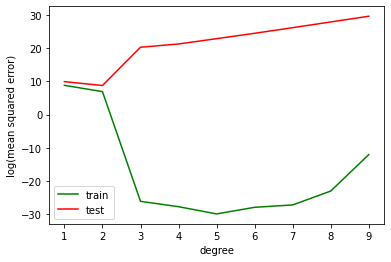

In [46]:
plt.plot(graph_x, graph_y_train, color='green', label='train')
plt.plot(graph_x, graph_y, color='red', label='test')
plt.ylabel('log(mean squared error)')
plt.xlabel('degree')
plt.legend(loc='lower left')




In [47]:
from sklearn.linear_model import Ridge

def plot_approximation(est, ax, label=None):

# """Plot the approximation of ``est`` on axis ``ax``. """

  ax.plot(x_plot, f(x_plot), color='green')

  ax.scatter(X_train, y_train, s=10)

  ax.plot(x_plot, est.predict(x_plot[:, np.newaxis]), color='red', label=label)

  ax.set_ylim((-2, 2))

  ax.set_xlim((0, 1))

  ax.set_ylabel('y')

  ax.set_xlabel('x')

  ax.legend(loc='upper right')  #, fontsize='small')

def plot_coefficients(est, ax, label=None, yscale='log'):
  coef = est.steps[-1][1].coef_.ravel()
  if yscale == 'log':
    ax.semilogy(np.abs(coef), marker='o', label=label)
    ax.set_ylim((1e-1, 1e8))
  else:
    ax.plot(np.abs(coef), marker='o', label=label)
    ax.set_ylabel('abs(coefficient)')
    ax.set_xlabel('coefficients')
    ax.set_xlim((1, 9))



####################################################
# If the degree is larger the session would crash.
####################################################

from sklearn.linear_model import Lasso
from sklearn.pipeline import make_pipeline
degree = 2 # If I set the degree higher it will use all available RAM and the session would crash.
alphas = [0.0, 0.1, 10, 100, 1000, 10000, 100000, 1000000, 1200000] # [0.0, 1e-8, 1e-5, 1e-1, 1]
for alpha in (alphas):
  X_fish_train_pol = poly.fit_transform(X_fish_train_categorical) ### X_fish_train
  X_fish_test_pol = poly.fit_transform(X_fish_test_categorical)

  est = make_pipeline(PolynomialFeatures(degree), Lasso(alpha=alpha))
  est.fit(X_fish_train_pol, y_fish_train_categorical)
  # poly = PolynomialFeatures(degree)

  # regressor = Ridge(alpha = alpha)#LinearRegression()
  # regressor.fit(X_fish_train_pol, y_fish_train_categorical) # regressor.fit(X_fish_train_pol, y_fish_train)  
  y_pred = est.predict(X_fish_test_pol) #regressor.predict(X_fish_test_pol)
  print("Alpha = {alpha}, the mean squared error for degree {degree} is {MSE}".format(alpha = alpha, degree = degree , MSE = mean_squared_error(y_pred, y_fish_test, squared=True)))
  print("Alpha = {alpha}, the coefficient of determination for degree {degree} is {r2}".format(alpha = alpha, degree = degree, r2 = r2_score(y_pred, y_fish_test)))

# It also crashes
# ####################################################
# # Fish data without species
# ####################################################


# degree = 2 # If I set the degree higher it will use all available RAM and the session would crash.
# alphas = [0.0, 0.1, 10, 100, 1000, 10000, 100000, 1000000, 1200000] # [0.0, 1e-8, 1e-5, 1e-1, 1]
# for alpha in (alphas):
#   X_fish_train_pol = poly.fit_transform(X_fish_train_pol) ### X_fish_train
#   X_fish_test_pol = poly.fit_transform(X_fish_test_pol)

#   est = make_pipeline(PolynomialFeatures(degree), Lasso(alpha=alpha))
#   # est.fit(X_fish_train_pol, y_fish_train_categorical)
#   est.fit(X_fish_train_pol, y_fish_train)
#   # poly = PolynomialFeatures(degree)
#   # regressor = Ridge(alpha = alpha)#LinearRegression()
#   # regressor.fit(X_fish_train_pol, y_fish_train_categorical) # regressor.fit(X_fish_train_pol, y_fish_train)  
#   y_pred = est.predict(X_fish_test_pol) #regressor.predict(X_fish_test_pol)
#   print("Alpha = {alpha}, the mean squared error for degree {degree} is {MSE}".format(alpha = alpha, degree = degree , MSE = mean_squared_error(y_pred, y_fish_test, squared=True)))
#   print("Alpha = {alpha}, the coefficient of determination for degree {degree} is {r2}".format(alpha = alpha, degree = degree, r2 = r2_score(y_pred, y_fish_test)))
  

/usr/local/lib/python3.8/dist-packages/sklearn/pipeline.py:394: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  self._final_estimator.fit(Xt, y, **fit_params_last_step)
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_coordinate_descent.py:647: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.126e+04, tolerance: 1.383e+03 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordin

Alpha = 0.0, the mean squared error for degree 2 is 6251.586256509556
Alpha = 0.0, the coefficient of determination for degree 2 is 0.9563176358500196


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.344e+04, tolerance: 1.383e+03
  model = cd_fast.enet_coordinate_descent(


Alpha = 0.1, the mean squared error for degree 2 is 6571.797760511243
Alpha = 0.1, the coefficient of determination for degree 2 is 0.953945048579936


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.013e+04, tolerance: 1.383e+03
  model = cd_fast.enet_coordinate_descent(


Alpha = 10, the mean squared error for degree 2 is 9308.152021632084
Alpha = 10, the coefficient of determination for degree 2 is 0.9307118942107073


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.732e+04, tolerance: 1.383e+03
  model = cd_fast.enet_coordinate_descent(


Alpha = 100, the mean squared error for degree 2 is 11807.324163411371
Alpha = 100, the coefficient of determination for degree 2 is 0.9072069656380112


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.776e+04, tolerance: 1.383e+03
  model = cd_fast.enet_coordinate_descent(


Alpha = 1000, the mean squared error for degree 2 is 16197.314946006074
Alpha = 1000, the coefficient of determination for degree 2 is 0.862551635205875


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.106e+05, tolerance: 1.383e+03
  model = cd_fast.enet_coordinate_descent(


Alpha = 10000, the mean squared error for degree 2 is 20264.46503568989
Alpha = 10000, the coefficient of determination for degree 2 is 0.8228216428430046


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.277e+05, tolerance: 1.383e+03
  model = cd_fast.enet_coordinate_descent(


Alpha = 100000, the mean squared error for degree 2 is 27906.731114455135
Alpha = 100000, the coefficient of determination for degree 2 is 0.7353240187964993


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.224e+04, tolerance: 1.383e+03
  model = cd_fast.enet_coordinate_descent(


Alpha = 1000000, the mean squared error for degree 2 is 15952.0557663294
Alpha = 1000000, the coefficient of determination for degree 2 is 0.8698240306778369
Alpha = 1200000, the mean squared error for degree 2 is 14605.45059371524
Alpha = 1200000, the coefficient of determination for degree 2 is 0.8849567261544803


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.361e+04, tolerance: 1.383e+03
  model = cd_fast.enet_coordinate_descent(


[YOUR ANSWER HERE]
1. Species is important, as the most impactful_coef is at x5, which is the one-hot encoding of species 1. 
2. Polynomial at order 2 has an appropriate fit since it has the lowest MSE (mean squared error) and the highest r2 score.
3. Regularization prevents the model from overfitting. But if the alpha is too small or 0, it doesn't help the model prevent overfitting. If the alpha is too big, it will punish weights too much that the model would become underfitting. So an appropriate alpha for regularization is important.
4. 


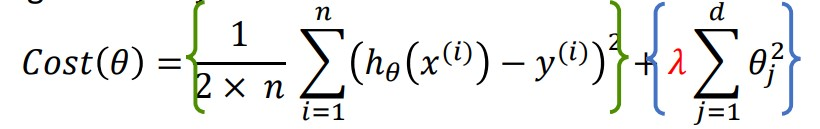


The cost function would be like this, with λ around 1000000 (sorry if the value of λ is far from the actual answer because I can't see the result of a degree larger than 2 or the session would crash). A degree of 2 seems to be the best model with the lowest MSE of 6438.278313609146 and the highest r2 of 0.9545815551856645.